<a href="https://colab.research.google.com/github/mary-zhitarchuk/LR1_NN_Zhitarchuk_Sultanov_6131/blob/main/Cats_and_Dogs_Model_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog
!unzip -q 'cat-and-dog.zip'

Saving kaggle.json to kaggle.json
100% 218M/218M [00:01<00:00, 224MB/s]
100% 218M/218M [00:01<00:00, 227MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

image_width, image_height = 64, 64 # Указываем разрешение для изображений к единому формату

directory_data_train= '/content/training_set/training_set' #Указываем путь к обучающей выборке 
directory_data_validation= '/content/test_set/test_set'  #Указываем путь к проверочной выборке 

# Сразу устанавливаем необходимые параметры

train_sample = 8000
validation_sample = 2000
epochs = 75
lot_size = 128  #batch_size 
if K.image_data_format() != 'channels_first':
     input_shape = (image_width, image_height, 3)
else:
     input_shape = (3, image_width, image_height) 

In [4]:
pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(32, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(32, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(64, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Четвертый слой нейросети
pattern.add(Conv2D(128, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

#Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(128))
pattern.add(Activation('relu'))
pattern.add(Dropout(0.5))
pattern.add(Dense(2)) # число классов
pattern.add(Activation('sigmoid'))

#Cкомпилируем модель с выбранными параметрами + метрика для оценки.
pattern.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [5]:
# Параметры аугментации
train_datagen = ImageDataGenerator(
    rescale=1. / 255, # коэффициент масштабирования
    shear_range = 0.5, # Интенсивность сдвига
    zoom_range = 0.2, # Диапазон случайного увеличения
    horizontal_flip=True,
    vertical_flip=True) # Произвольный поворот

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
#Предобработка обучающей выборки
train_processing = train_datagen.flow_from_directory(
    directory_data_train,
    target_size=(image_width, image_height), # Размер изображений
    batch_size=lot_size, #Размер пакетов данных 
    class_mode='categorical') # Режим класса 

#Предобработка тестовой выборки
validation_processing= test_datagen.flow_from_directory(
    directory_data_validation,
    target_size=(image_width, image_height),
    batch_size=lot_size,
    class_mode='categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [7]:
history = pattern.fit(
    train_processing, # Помещаем обучающую выборку
    steps_per_epoch=train_sample // lot_size, #количество итераций пакета до того, как период обучения считается завершенным
    epochs=epochs, # Указываем количество эпох
    validation_data=validation_processing, # Помещаем проверочную выборку
    validation_steps=validation_sample  // lot_size) # Количество итераций на проверочном пакете данных

Epoch 1/75
62/62 [==============================] - 88s 1s/step - loss: 0.6931 - accuracy: 0.5255 - val_loss: 0.6862 - val_accuracy: 0.5208
Epoch 2/75
62/62 [==============================] - 71s 1s/step - loss: 0.6781 - accuracy: 0.5831 - val_loss: 0.6543 - val_accuracy: 0.6141
Epoch 3/75
62/62 [==============================] - 72s 1s/step - loss: 0.6575 - accuracy: 0.6150 - val_loss: 0.6289 - val_accuracy: 0.6526
Epoch 4/75
62/62 [==============================] - 70s 1s/step - loss: 0.6289 - accuracy: 0.6430 - val_loss: 0.6026 - val_accuracy: 0.6901
Epoch 5/75
62/62 [==============================] - 70s 1s/step - loss: 0.6169 - accuracy: 0.6538 - val_loss: 0.6411 - val_accuracy: 0.6271
Epoch 6/75
62/62 [==============================] - 70s 1s/step - loss: 0.6057 - accuracy: 0.6702 - val_loss: 0.5900 - val_accuracy: 0.7031
Epoch 7/75
62/62 [==============================] - 69s 1s/step - loss: 0.6005 - accuracy: 0.6798 - val_loss: 0.6043 - val_accuracy: 0.6766
Epoch 8/75
62/62 [==

<Figure size 432x288 with 0 Axes>

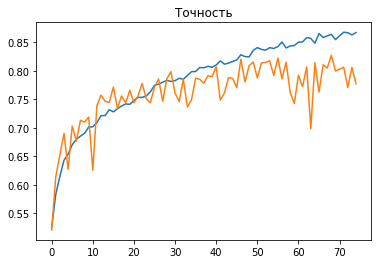

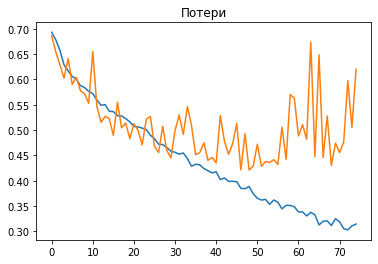

<Figure size 432x288 with 0 Axes>

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'],label='Точность на обучении')
plt.plot(history.history['val_accuracy'],label='Точность на валидации')
plt.title('Точность')
plt.figure()

plt.plot(history.history['loss'],label='Потери на обучении')
plt.plot(history.history['val_loss'],label='Потери на валидации')
plt.title('Потери')
plt.figure()

In [9]:
pattern.save('model_1') #Сохранение модели

INFO:tensorflow:Assets written to: model_1/assets


<Figure size 864x864 with 0 Axes>

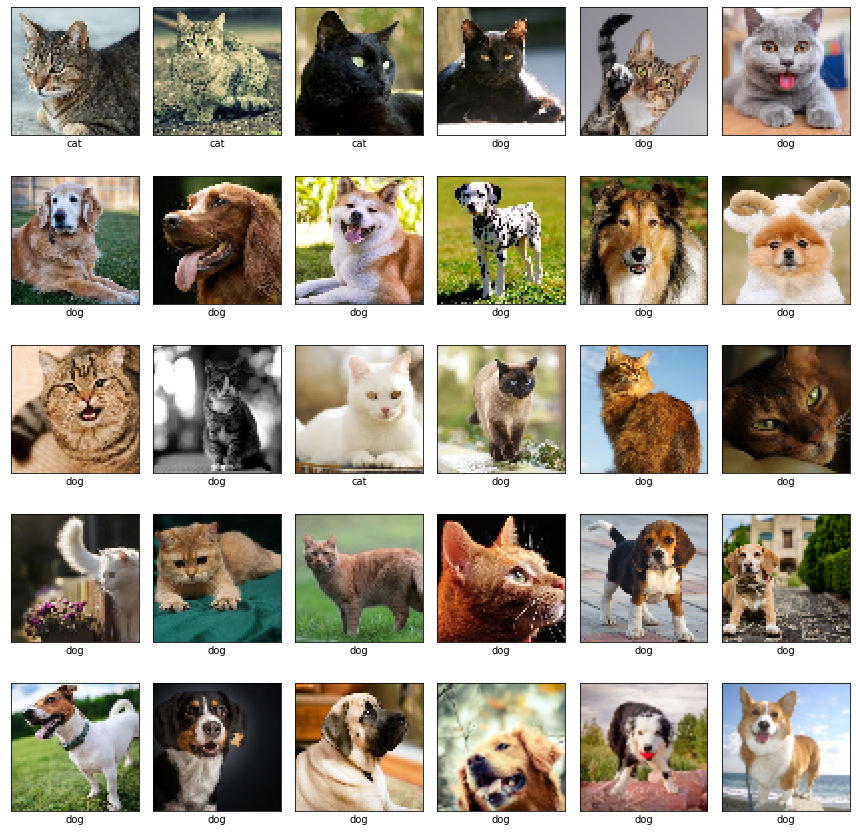

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
test_filenames = os.listdir("/content/gdrive/MyDrive/control_set")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
sample_test = test_df.head(30)
sample_test.head()
plt.figure(figsize=(12, 12))
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
  filename = row['filename']
  img = load_img("/content/gdrive/MyDrive/control_set/" + filename, target_size=(64, 64))
  test_image = image.load_img("/content/gdrive/MyDrive/control_set/" + filename,
                              target_size=(64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  result =pattern.predict(test_image)
  if result[0][0] == 0:
    prediction = 'dog'
    category = prediction
  else:
    prediction = 'cat'
    category = prediction

  axes = plt.subplot(5, 6, index + 1)
  plt.imshow(img)
  plt.xlabel(format(category))
  axes.set_yticks([])
  axes.set_xticks([])
plt.tight_layout()
plt.show()